In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\PJugantM\Downloads\Customer Churn.csv") 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# lets convert the Totalcharges datatype from object to float .
# And replacing the blanks with 0 as tenure .
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype('float') 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# checking the null values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df['customerID'].duplicated().sum()

0

In [10]:
def convert(value):
    if value ==1 :
        return "yes"
    else:
        return "No"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)

Converted o and 1 value of senior citizen to yes/no to make it easier to understand 

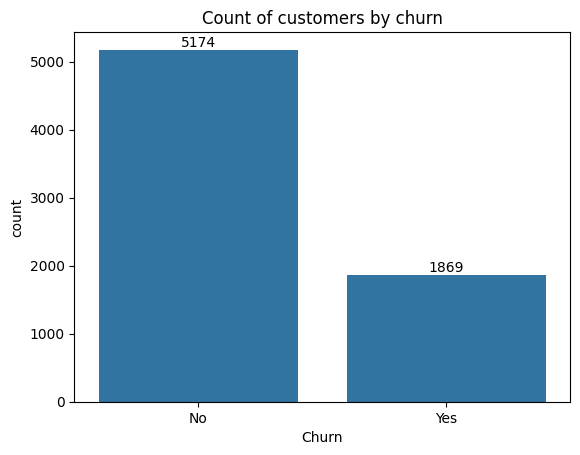

In [11]:
ax=sns.countplot(x='Churn' ,data=df) 
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

In [12]:
gb=df.groupby("Churn").agg({'Churn':'count'})
gb


,Churn
Churn,
No,5174
Yes,1869


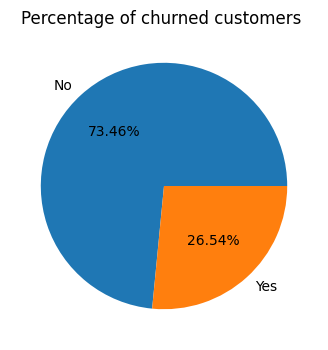

In [13]:
plt.figure(figsize=(5,4))
plt.pie(gb['Churn'],labels = gb.index,autopct="%1.2f%%")
plt.title("Percentage of churned customers ")
plt.show()

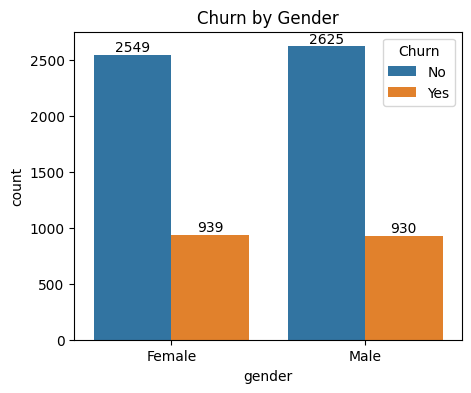

In [14]:
plt.figure(figsize=(5,4))

ax2=sns.countplot(x='gender',data=df,hue="Churn")
for container in ax2.containers:
    ax2.bar_label(container)
plt.title("Churn by Gender")
plt.show()

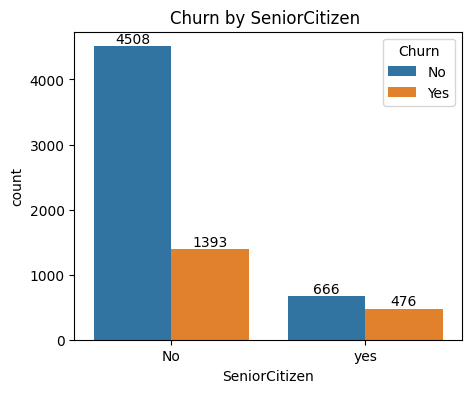

In [16]:
plt.figure(figsize=(5,4))

ax3=sns.coun tplot(x='SeniorCitizen',data=df,hue="Churn")
for container in ax3.containers:
    ax3.bar_label(container)
plt.title("Churn by SeniorCitizen ")
plt.show()  

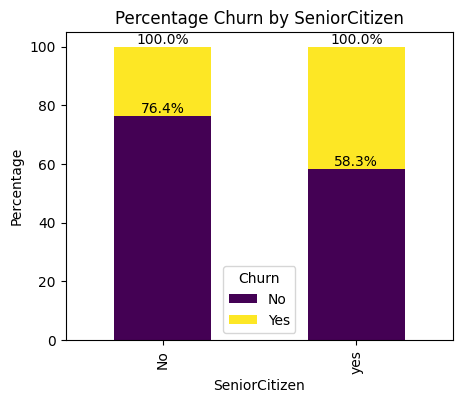

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate percentage
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='counts')
df_total = df.groupby('SeniorCitizen').size().reset_index(name='total')
df_merged = pd.merge(df_grouped, df_total, on='SeniorCitizen')
df_merged['percentage'] = df_merged['counts'] / df_merged['total'] * 100

# Pivot the data to use it for a stacked bar plot
df_pivot = df_merged.pivot(index='SeniorCitizen', columns='Churn', values='percentage').fillna(0)

# Plot
df_pivot.plot(kind='bar', stacked=True, figsize=(5, 4), colormap='viridis')

# Add percentage labels
for i, bars in enumerate(plt.gca().containers):
    plt.gca().bar_label(bars, fmt='%.1f%%')

plt.title("Percentage Churn by SeniorCitizen")
plt.ylabel("Percentage")
plt.show()


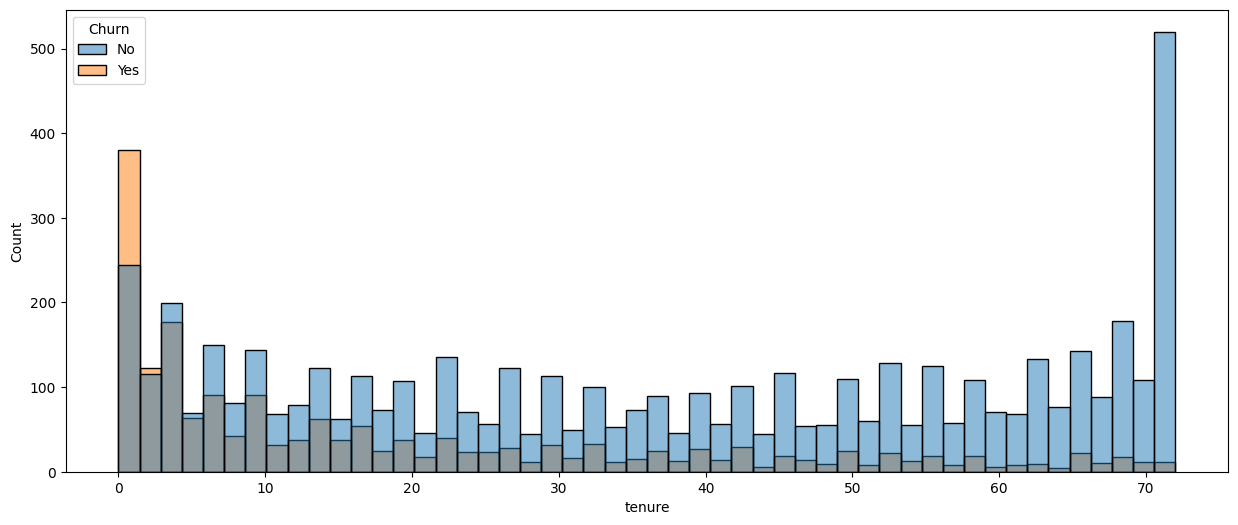

In [27]:
plt.figure(figsize=(15,6))

sns.histplot(x='tenure',data=df ,bins=50,hue='Churn')
plt.show()

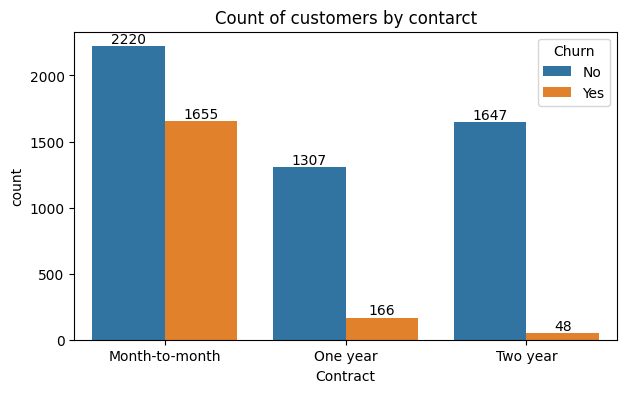

In [29]:
plt.figure(figsize=(7,4))

ax4=sns.countplot(x='Contract',data=df,hue="Churn")
for container in ax4.containers:
    ax4.bar_label(container)
plt.title("Count of customers by contarct")
plt.show()  

In [34]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

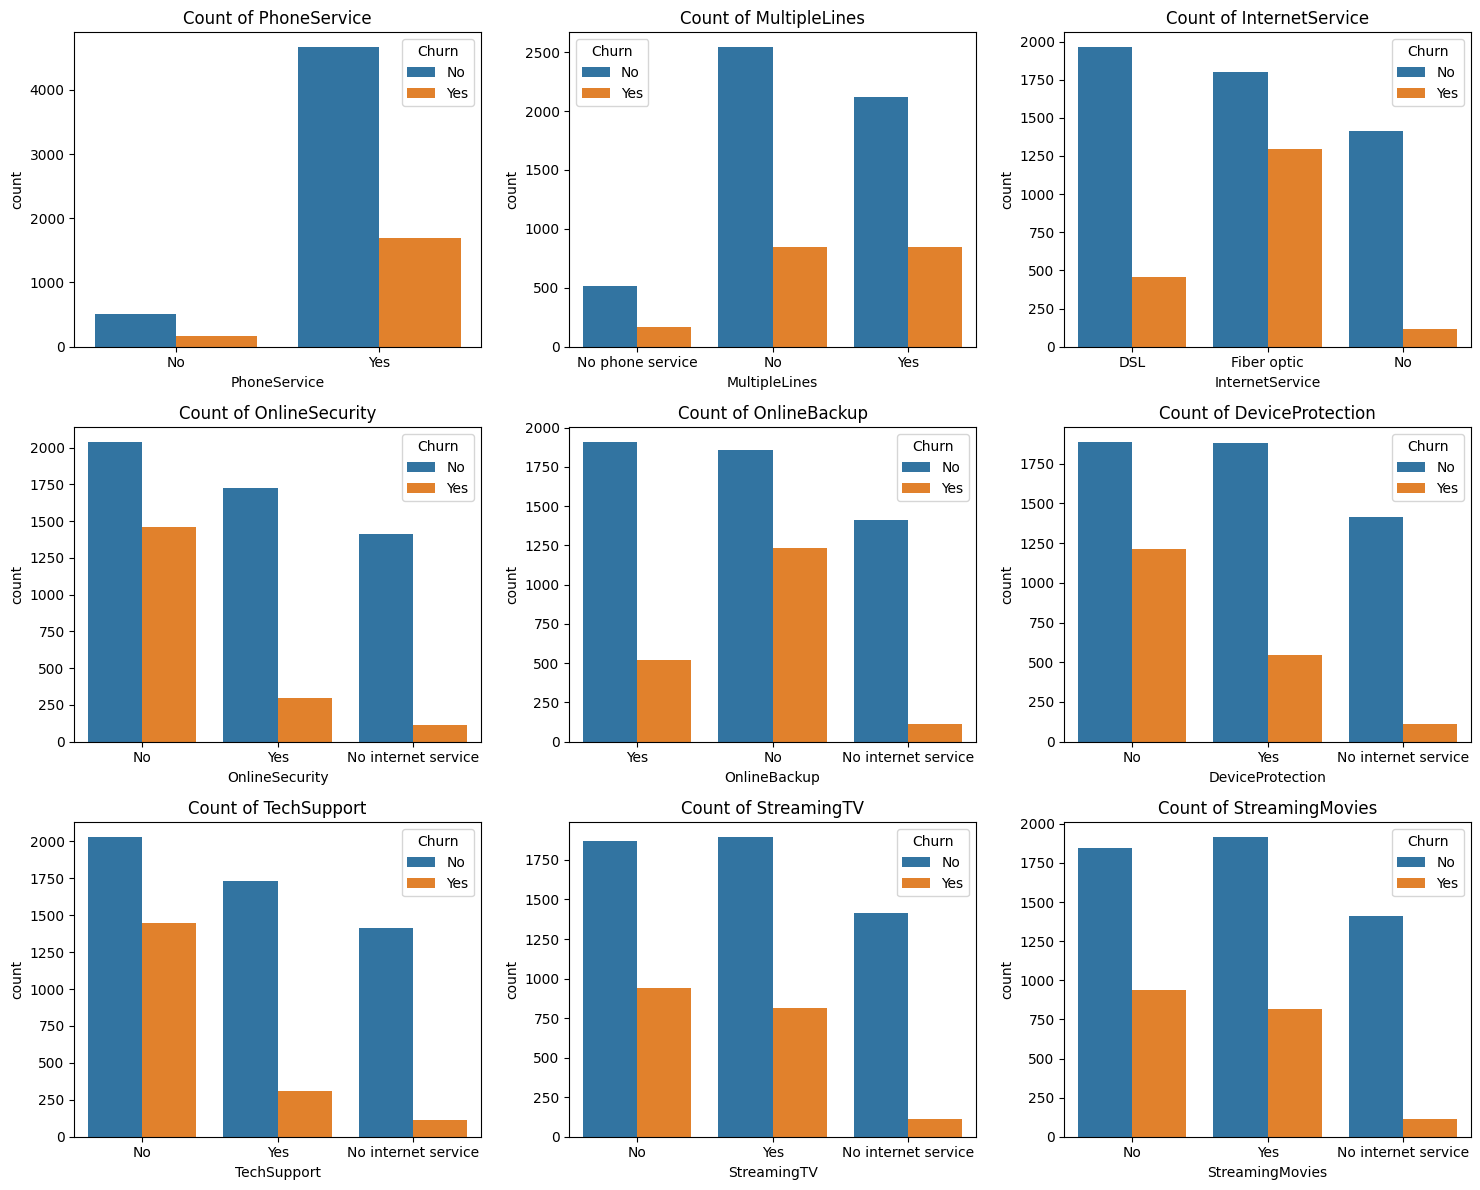

In [36]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplots: Adjust the number of rows and columns based on how you want to arrange them
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each column and create a count plot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df,hue='Churn', ax=axes[i])
    axes[i].set_title(f"Count of {column}")

# Adjust layout so the plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()


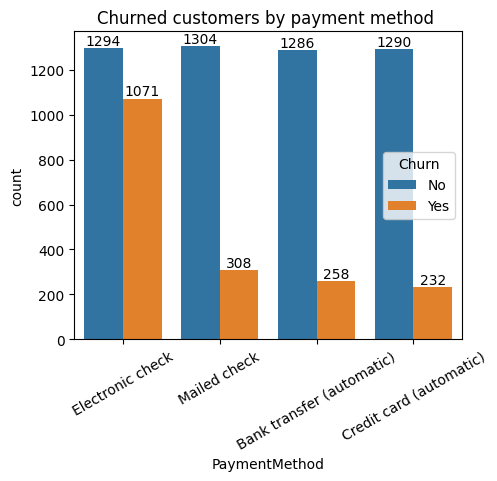

In [33]:
plt.figure(figsize=(5,4))

ax4=sns.countplot(x='PaymentMethod',data=df,hue="Churn")
for container in ax4.containers:
    ax4.bar_label(container)
plt.title("Churned customers by payment method ")
plt.xticks(rotation=30)
plt.show()  